In [1]:
#Устанавливаем библеотеку tf-keras-vis
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 3.3 MB/s eta 0:00:00


In [2]:
# Подключаем все необходимые библеотеки
!pip install tf-keras-vis
%reload_ext autoreload
%autoreload 2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus
from tensorflow.keras.applications.vgg16 import VGG16 as Model
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.utils.scores import CategoricalScore
from tensorflow.keras import backend as K
from tf_keras_vis.saliency import Saliency
from matplotlib import cm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus

In [3]:
# загрузим модель VGG16
model = Model(weights='imagenet', include_top=True)
model.summary()

553467096/553467096 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 4096)                │     102,764,544 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 138,357,544 (527.79 MB)

 Trainable params: 138,357,544 (527.79 MB)

 Non-trainable params: 0 (0.00 B)

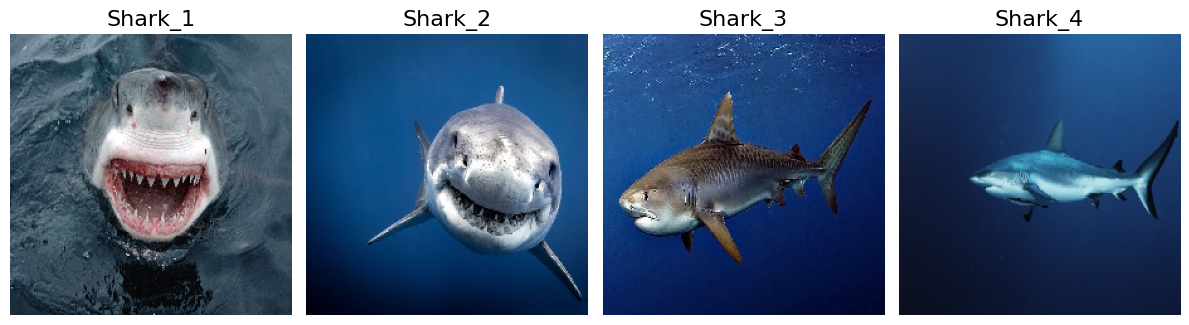

In [4]:
# Загрузка, предобработка и визуализация изображений
image_paths = ['1.jpg', '2.jpg', '3.jpg', '4.jpg']
image_titles = ['Shark_1', 'Shark_2', 'Shark_3', 'Shark_4']

images = np.array([np.array(load_img(img, target_size=(224, 224))) for img in image_paths])
X = preprocess_input(images)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for ax, img, title in zip(axes, images, image_titles):
    ax.imshow(img)
    ax.set_title(title, fontsize=16)
    ax.axis('off')
plt.tight_layout()
plt.show()

In [5]:
replace2linear = ReplaceToLinear()

def modify_model(model):
    model.layers[-1].activation = tf.keras.activations.linear

score_function = lambda output: tuple(output[i][308] for i in range(4))
score = CategoricalScore([308] * 4)

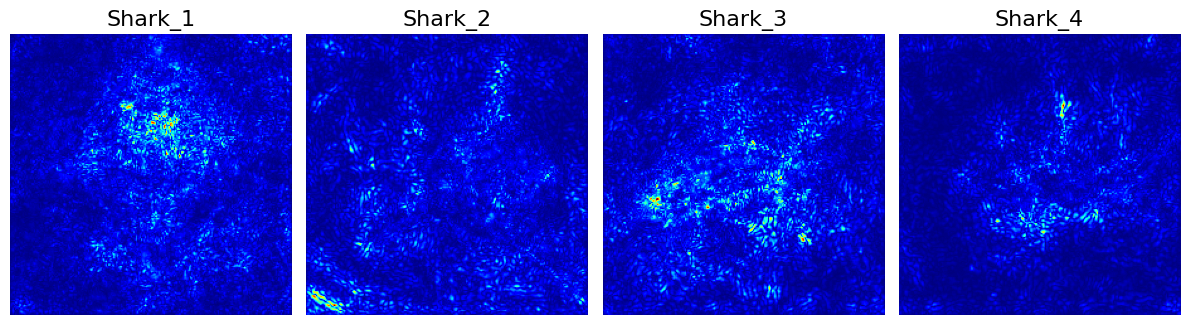

CPU times: user 4.2 s, sys: 1.11 s, total: 5.31 s
Wall time: 6.41 s


In [6]:
# Визуализация карты важности
%%time
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
saliency_map = saliency(score, X)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for ax, img, title in zip(axes, saliency_map, image_titles):
    ax.imshow(img, cmap='jet')
    ax.set_title(title, fontsize=16)
    ax.axis('off')
plt.tight_layout()
plt.show()

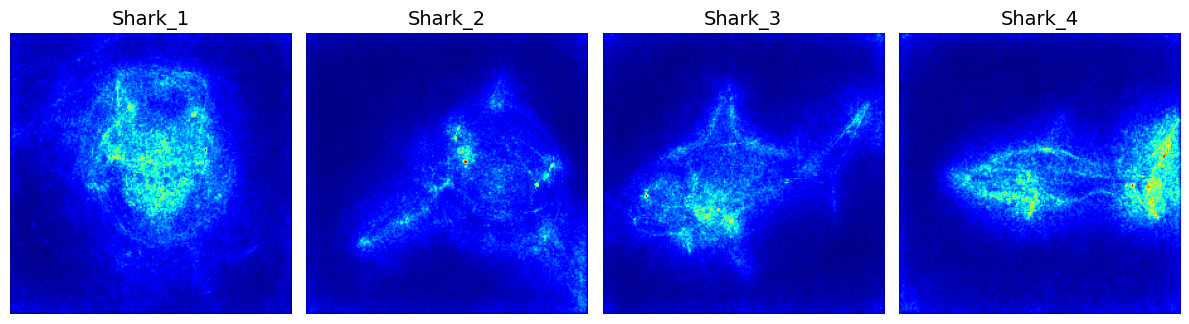

CPU times: user 2.42 s, sys: 260 ms, total: 2.68 s
Wall time: 3.77 s


In [7]:
# Так как арта saliency шумная выведем ее с использованием SmoothGrad
%%time
saliency_map = saliency(score, X, smooth_samples=20, smooth_noise=0.2)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for ax, img, title in zip(axes, saliency_map, image_titles):
    ax.imshow(img, cmap='jet')
    ax.set_title(title, fontsize=14)
    ax.axis('off')
plt.tight_layout()
plt.savefig('smoothgrad.png')
plt.show()

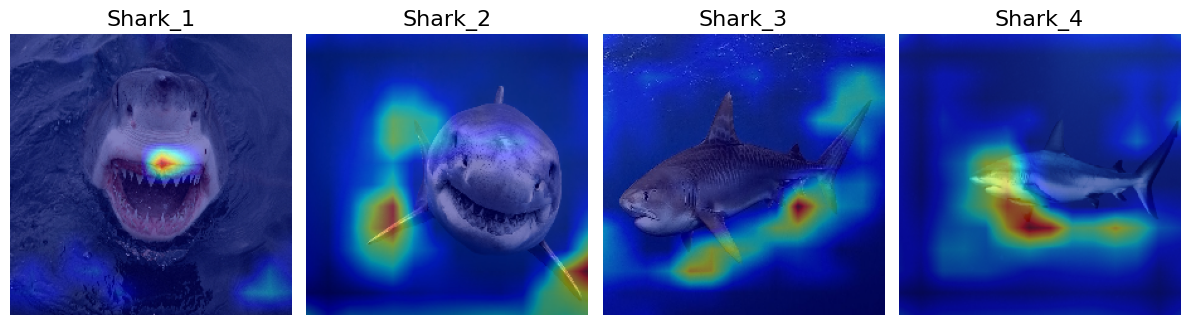

CPU times: user 1.43 s, sys: 811 ms, total: 2.24 s
Wall time: 2.1 s


In [8]:
# Визуализация с использованием GradCAM
%%time
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)
cam = gradcam(score, X, penultimate_layer=-1)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for ax, img, heatmap, title in zip(axes, images, cam, image_titles):
    ax.imshow(img)
    ax.imshow(np.uint8(cm.jet(heatmap)[..., :4] * 255), cmap='jet', alpha=0.5)
    ax.set_title(title, fontsize=16)
    ax.axis('off')
plt.tight_layout()
plt.show()

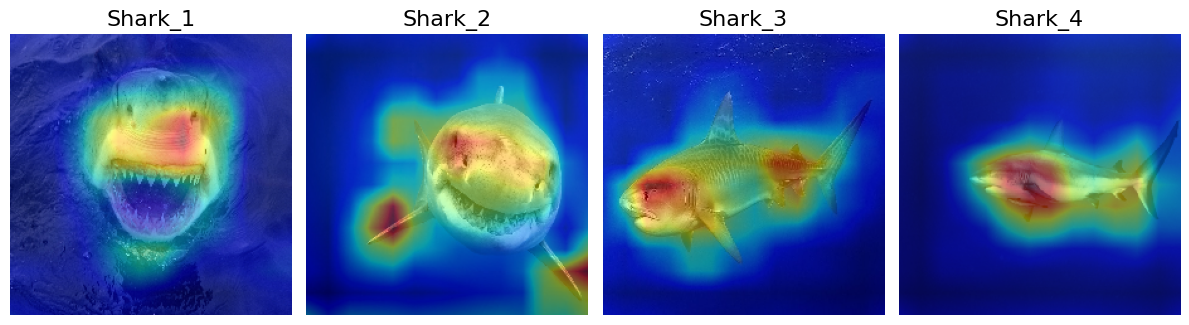

CPU times: user 1.8 s, sys: 838 ms, total: 2.64 s
Wall time: 2.56 s


In [9]:
# Визуализация с GradCAM++
%%time
gradcam_pp = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)
cam = gradcam_pp(score, X, penultimate_layer=-1)

fig, axes = plt.subplots(1, 4, figsize=(12, 4))
for ax, img, heatmap, title in zip(axes, images, cam, image_titles):
    ax.imshow(img)
    ax.imshow(np.uint8(cm.jet(heatmap)[..., :4] * 255), cmap='jet', alpha=0.5)  # Наложение
    ax.set_title(title, fontsize=16)
    ax.axis('off')
plt.tight_layout()
plt.savefig('gradcam_plus_plus.png')
plt.show()

Вывод:

Выводы

В ходе лабораторной работы был изучен процесс создания карт внимания для анализа изображений из датасета ImageNet с использованием нейронных сетей. Основные этапы выполнения работы включали:

	•	Замена функции активации softmax на линейную для корректного вычисления градиентов.
	•	Построение карт значимости классов для выбранных изображений с применением методов saliency, smoothgrad, gradcam и gradcam++.
	•	Сравнение результатов и анализ наиболее точного и информативного метода визуализации активаций слоев нейронной сети.

В результате работы были получены наглядные карты значимости признаков и классов для изображений из датасета ImageNet. Это позволило глубже понять, какие части изображения оказывают наибольшее влияние на классификацию, а также освоить современные методы построения карт внимания.